Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [25]:
theta_real = 0.36
n_trials = 100000

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [26]:
data = stats.bernoulli.rvs(theta_real, size=n_trials)

In [27]:
data

array([1, 1, 0, ..., 1, 0, 0])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui la prior (e di conseguenza la posterior) sono distribuzioni Beta. 

![Diagramma modello beta-bernoulli.](assets/betabernoulli.png)

In [43]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
alpha = 100
beta = 100
hyper = [alpha, beta]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [44]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 100000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Plot della distribuzione a priori di $\theta$

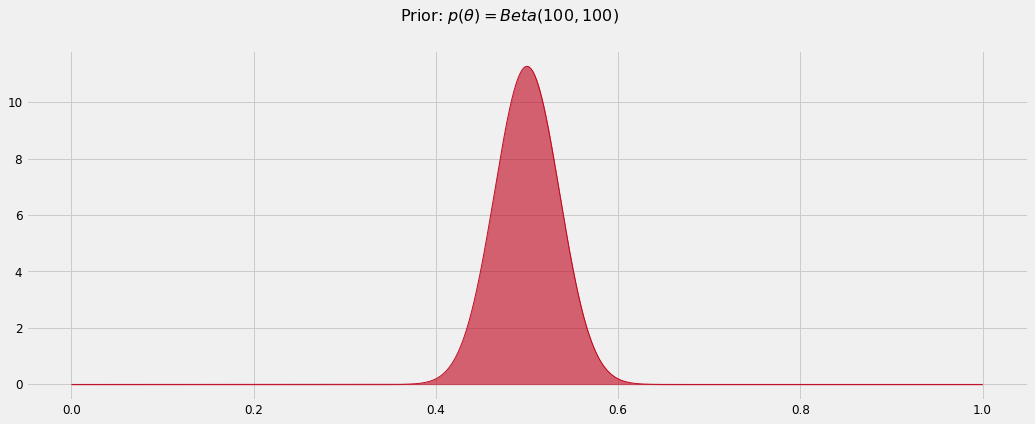

In [45]:
fig, ax = plt.subplots(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
# testo sull'asse x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout
# titolo della figura
plt.suptitle(r'Prior: $p(\theta)=Beta({0:3d}, {1:3d})$'.format(alpha, beta), fontsize=16)
plt.show()

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [46]:
n = 500

In [47]:
# determina numero di esiti pari a 1
ones = data[:n].sum()
# modifica i parametri della distribuzione per tener conto degli esiti osservati
params = [sum(t) for t in zip(hyper, [ones, n-ones])]
# calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
post = dist.pdf(x, *params)
# calcola il valore sulla griglia per cui la distribuzione a posteriori è massima
mp = x[np.argmax(post)]
# calcola elenco dei valori per la verosimiglianza con la probabilità considerata
lik = [p**ones*(1-p)**(n-ones) for p in x]
# calcola il valore sulla griglia per cui la verosimiglianza è massima
ml = x[np.argmax(lik)]
# calcola il valore dell'evidenza
ev = np.sum(list(map(lambda x,y:x*y/float(nv), lik, yp)))

Visualizza la distribuzione a priori, la verosimiglianza e la distribuzione a posteriori per il numero di osservazioni considerato

In [48]:
def plot_dist(color):
    fig, ax = plt.subplots(figsize=(16,10))
    ax=plt.subplot(2,1,1)
    ax.plot(x, lik, '-', c=color, linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, lik, color=color, alpha=0.3)
    # testo sull'asse x
    plt.xlabel(r"$\theta$",fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Likelihood; ML={0:8.5f}'.format(ml), fontsize=14)
    ax=plt.subplot(2,1,2)
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax.plot(x, post, '-', c=color, linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, post, color=color, alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
    plt.annotate(r'Evidence; $p(X)={0:10.3e}$'.format(ev), xy=(.05, .85), va='top', xycoords='axes fraction', 
                 fontsize=14)
    # testo sull'asse x
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(r'Posterior; $p(\theta|X)=Beta({0:3d}, {1:3d})\qquad$ MAP={2:8.5f}'.format(params[0],params[1],mp), fontsize=14)
    #plt.tight_layout
    # titolo della figura
    plt.suptitle(r'$\theta={0:3.2f}\qquad n={1:3d}\qquad\#1={2:3d}\quad \#0={3:3d}$'.format(theta_real, 
                                                    n, ones, n-ones), fontsize=16)
    plt.show()

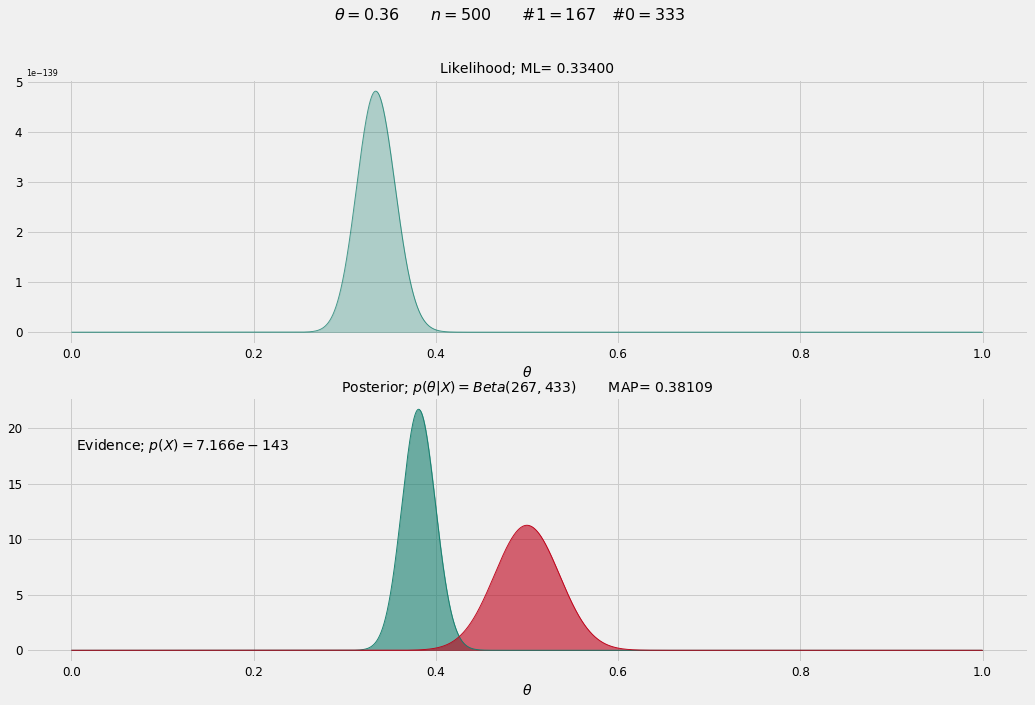

In [49]:
plot_dist(colors[6])

In [50]:
import pymc3 as pm
import seaborn as sns

In [51]:
with pm.Model() as model:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 41000/41000 [03:00<00:00, 227.41draws/s]
The acceptance probability does not match the target. It is 0.8790020184746558, but should be close to 0.8. Try to increase the number of tuning steps.


In [24]:
theta_data = data.sum()/len(data)

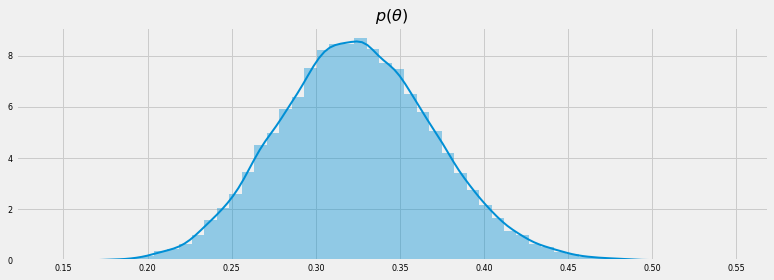

In [25]:
fig = plt.figure(figsize=(12,4))
sns.distplot(trace['theta'])
plt.title(r'$p(\theta)$', fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2035d908>,
      dtype=object)

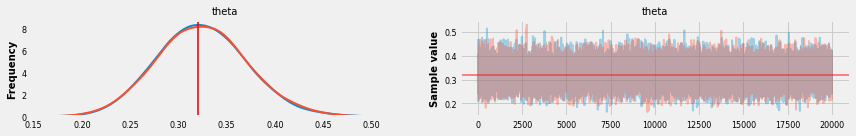

In [41]:
pm.traceplot(trace, lines={'theta':theta_data})

In [40]:
with model:
    multi_trace = pm.sample(1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1880.43draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1efb6400>,
      dtype=object)

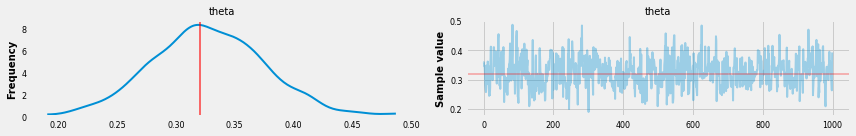

In [28]:
pm.traceplot(multi_trace, lines={'theta':theta_data})

In [29]:
pm.summary(multi_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
theta,0.327161,0.047773,0.002238,0.233053,0.418637


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f089320>]],
      dtype=object)

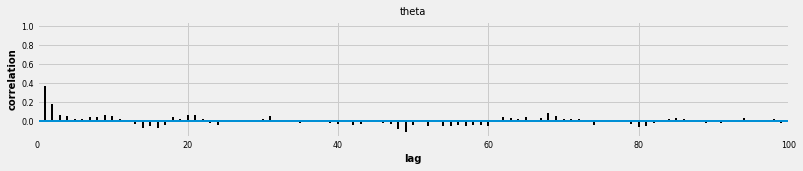

In [30]:
pm.autocorrplot(multi_trace)

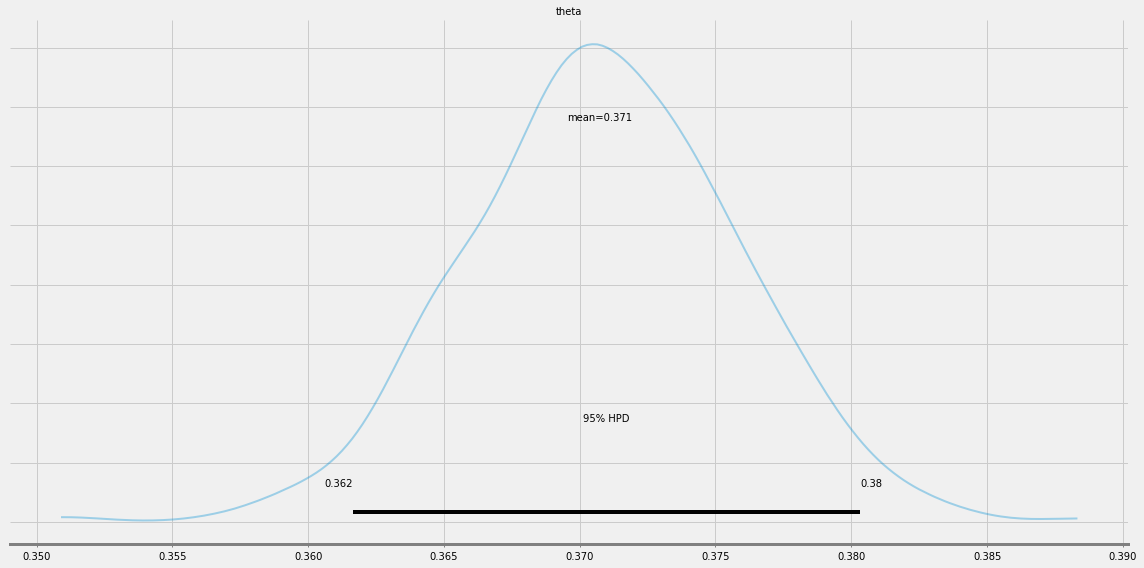

In [226]:
pm.plot_posterior(multi_trace, kde_plot=True)